# Initial Check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl
df=pd.read_excel("/content/drive/MyDrive/TU dortmund assignment /Dataset.xlsx")
df.info()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.7 MB/s eta 0:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player name   3496 non-null   object
 1   Rider_class   3496 non-null   object
 2   Stage         3496 non-null   object
 3   Points        3496 non-null   int64 
 4   Stage_class   3496 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.7+ KB


# Descriptive Statistics

# Des Rider class

In [4]:
desc_by_rider = df.groupby("Rider_class")["Points"].describe()
desc_by_rider["Sum Points"] = df.groupby("Rider_class")["Points"].sum()
desc_by_rider

,count,mean,std,min,25%,50%,75%,max,Sum Points
Rider_class,,,,,,,,,
All Rounder,323.0,37.687307,63.961640,0.0,0.0,12.0,39.5,304.0,12173
Climber,437.0,20.169336,43.447254,0.0,0.0,6.0,16.0,269.0,8814
Sprinter,551.0,15.036298,41.832247,0.0,0.0,0.0,4.0,272.0,8285
Unclassed,2185.0,6.419680,23.282527,0.0,0.0,0.0,2.0,260.0,14027


# Graphic Rider class

/tmp/ipython-input-449687246.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.pointplot(
/tmp/ipython-input-449687246.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(
/tmp/ipython-input-449687246.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  ax = sns.pointplot(
/tmp/ipython-input-449687246.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby("Riderclass")["Points"].mean()
/tmp/ipython-input-449687246.py:31: UserWarn

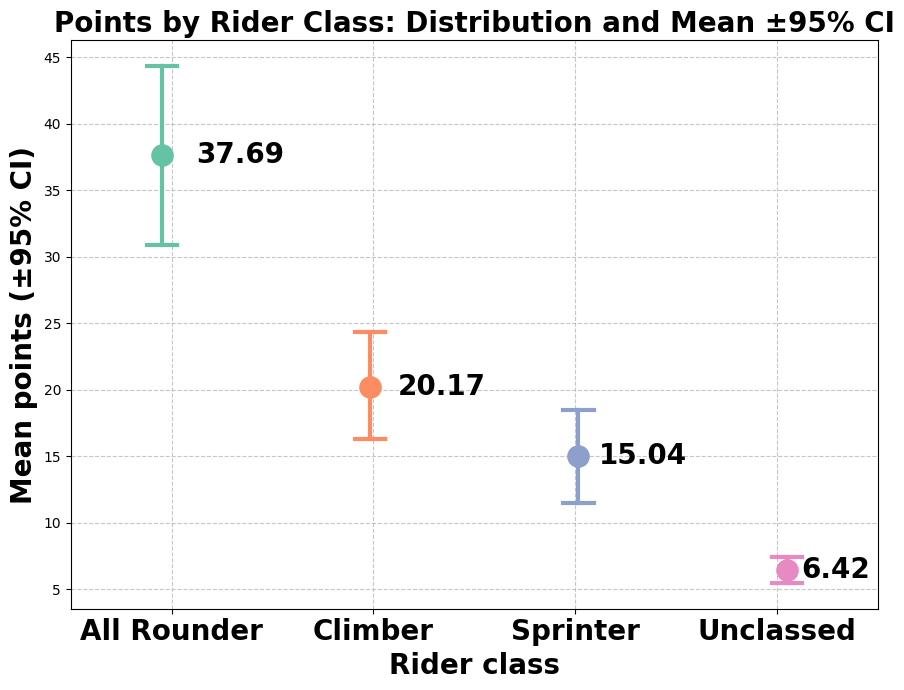

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["Riderclass"] = df["Rider_class"].astype("category")

plt.figure(figsize=(9, 7))
ax = sns.pointplot(
    data=df,
    x="Riderclass", y="Points",
    capsize=0.15,
    errwidth=3,         # thicker error bars
    linewidth=5,        # thicker line (if join=True later)
    dodge=0.1,
    join=False,
    palette="Set2"
)

# Compute means
means = df.groupby("Riderclass")["Points"].mean()

for i, (cls, m) in enumerate(means.items()):
    ax.text(i + 0.12, m, f"{m:.2f}",
            ha="left", va="center", fontsize=20, fontweight='bold')

plt.ylabel("Mean points (±95% CI)", fontsize=20, fontweight='bold')
plt.xlabel("Rider class", fontsize=20, fontweight='bold')
plt.title("Points by Rider Class: Distribution and Mean ±95% CI",
          fontsize=20, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

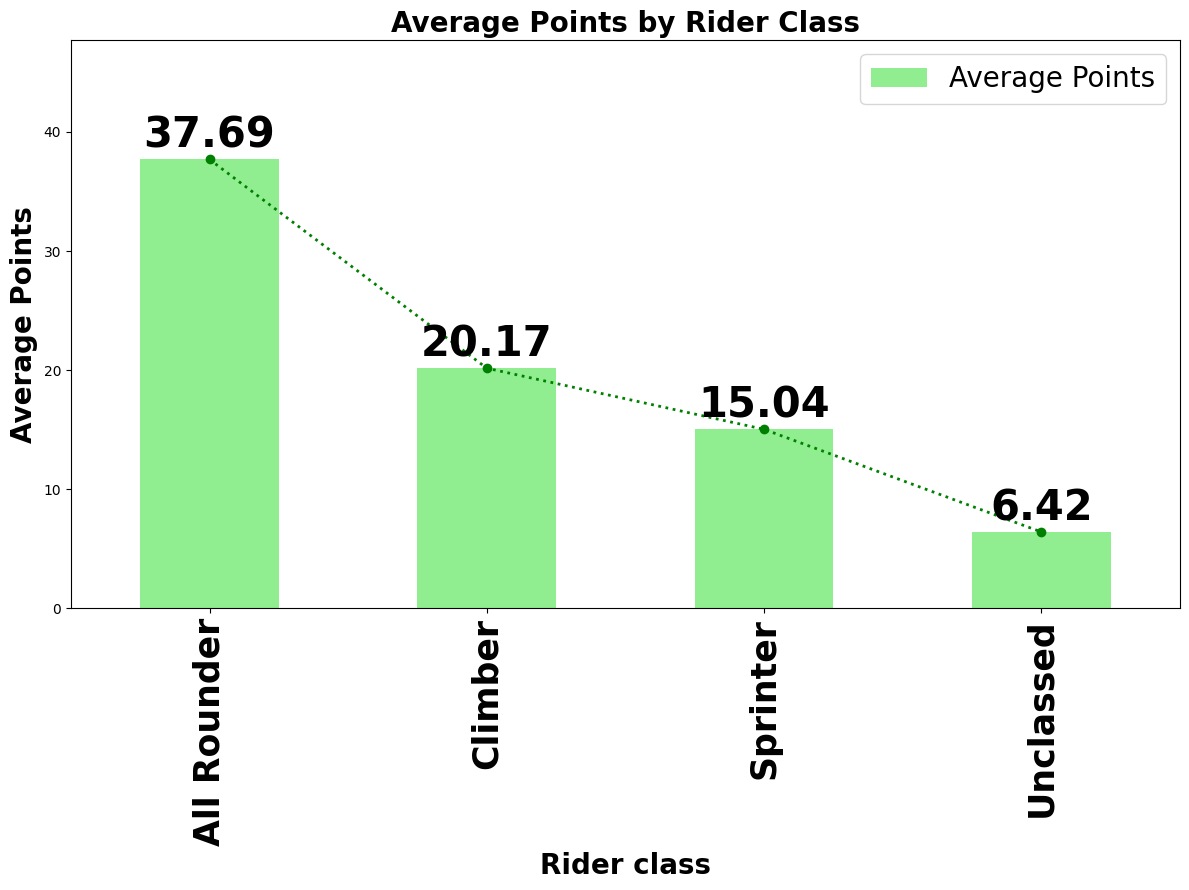

In [ ]:
import matplotlib.pyplot as plt

# Summary statistics
desc_by_stage = df.groupby("Rider_class")["Points"].describe()

# Mean points per rider class
avg_points = df.groupby("Rider_class")["Points"].mean()

plt.figure(figsize=(12, 9))

# Bar plot
ax = avg_points.plot(kind="bar", color='lightgreen', label="Average Points")

# Increase graph height so top label does not touch the line
plt.ylim(0, avg_points.max() + 10)

# Add dotted trend line
plt.plot(range(len(avg_points)), avg_points.values,
         linestyle='dotted', marker='o', linewidth=2, color='green')

# Add point labels
for i, value in enumerate(avg_points.values):
    plt.text(i, value + 1, f"{value:.2f}", ha='center', fontsize=30,fontweight='bold')

# Titles and labels
plt.title("Average Points by Rider Class",fontsize=20,fontweight='bold')
plt.xlabel("Rider class",fontsize=20,fontweight='bold')
plt.ylabel("Average Points",fontsize=20,fontweight='bold')
# Set x-tick labels bold and larger font
plt.setp(ax.get_xticklabels(),fontweight='bold',fontsize=25)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

# Des combined approach

In [5]:
# Compute the statistics by Rider_class and Stage_class
stats = df.groupby(['Rider_class', 'Stage_class'])['Points'].agg(
    count='count',
    Sum_Points='sum',
    mean='mean',
    std='std',
    min='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    max='max'
)

# Rename columns
stats = stats.rename(columns={
    'count': 'count',
    'Sum_Points': 'Sum Points',
    'mean': 'mean',
    'std': 'std',
    'min': 'min',
    'q25': '0.25',
    'q50': '0.50',
    'q75': '0.75',
    'max': 'max'
})

# Reset index to show as table
stats = stats.reset_index()
print(stats)


    Rider_class Stage_class  count  Sum Points       mean        std  min  \
0   All Rounder        flat    102        1575  15.441176  28.281671    0   
1   All Rounder       hills    136        4867  35.786765  57.459217    0   
2   All Rounder       mount     85        5731  67.423529  88.955898    0   
3       Climber        flat    138         703   5.094203   6.230239    0   
4       Climber       hills    184        3987  21.668478  45.984482    0   
5       Climber       mount    115        4124  35.860870  57.019985    0   
6      Sprinter        flat    174        6782  38.977011  63.588267    0   
7      Sprinter       hills    232        1207   5.202586  21.950897    0   
8      Sprinter       mount    145         296   2.041379   5.886515    0   
9     Unclassed        flat    690        3961   5.740580  19.801356    0   
10    Unclassed       hills    920        8369   9.096739  30.662585    0   
11    Unclassed       mount    575        1697   2.951304   7.905654    0   

# Graphic Combined

<Figure size 1200x800 with 0 Axes>

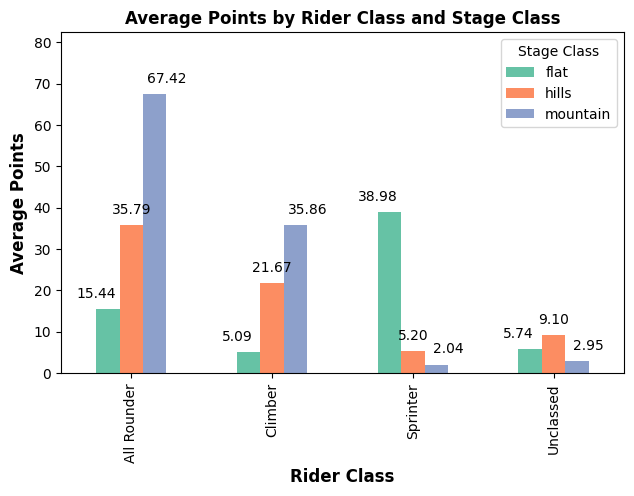

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data as extracted from your summary table
data = {
    'Rider_class': ['All Rounder', 'All Rounder', 'All Rounder',
                    'Climber', 'Climber', 'Climber',
                    'Sprinter', 'Sprinter', 'Sprinter',
                    'Unclassed', 'Unclassed', 'Unclassed'],
    'Stage_class': ['flat', 'hills', 'mountain',
                    'flat', 'hills', 'mountain',
                    'flat', 'hills', 'mountain',
                    'flat', 'hills', 'mountain'],
    'Points': [15.44, 35.79, 67.42,
               5.09, 21.67, 35.86,
               38.98, 5.20, 2.04,
               5.74, 9.10, 2.95]
}

mean_points = pd.DataFrame(data)
pivot_df = mean_points.pivot(index='Rider_class', columns='Stage_class', values='Points')

# stage_colors = {
#     'flat': 'lightcoral',
#     'hills': 'lightsalmon',
#     'mountain': 'lightpink'
# }

stage_colors = {
    'flat': '#66c2a5',
    'hills': '#fc8d62',
    'mountain': '#8da0cb'
}



colors = [stage_colors[col] for col in pivot_df.columns]

# Increase height of the graph
plt.figure(figsize=(12, 8))

ax = pivot_df.plot(kind='bar', color=colors)
plt.ylabel('Average Points')
plt.legend(title='Stage Class')

# Fix labels touching the line
plt.ylim(0, pivot_df.values.max() + 15)

plt.tight_layout()

# Annotate bars with data values
for i, rider_class in enumerate(pivot_df.index):
    for j, stage_class in enumerate(pivot_df.columns):
        value = pivot_df.loc[rider_class, stage_class]
        ax.text(i + (j - 1) * 0.25,
                value + 2,                     # space above bar
                f"{value:.2f}",
                ha='center', va='bottom',
                fontsize=10)
plt.title('Average Points by Rider Class and Stage Class',fontweight='bold',fontsize=12)
plt.ylabel('Average Points', fontweight='bold',fontsize=12)
plt.xlabel('Rider Class', fontweight='bold',fontsize=12)

plt.show()


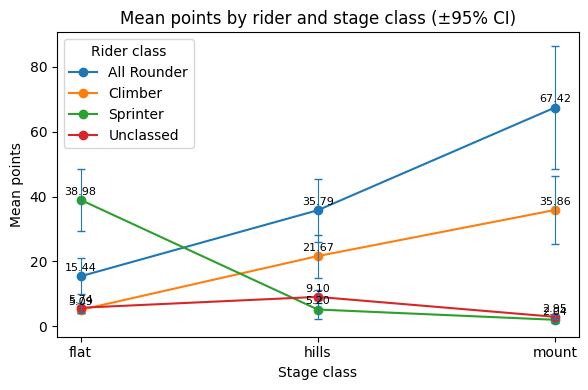

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# grouped as before, with columns: Stage_class, Rider_class, mean, ci_low, ci_high

plt.figure(figsize=(6,4))

for rc, g in grouped.groupby("Rider_class"):
    plt.plot(g["Stage_class"], g["mean"], marker="o", label=rc)
    plt.errorbar(g["Stage_class"], g["mean"],
                 yerr=[g["mean"] - g["ci_low"],
                       g["ci_high"] - g["mean"]],
                 fmt="none", capsize=3, linewidth=0.8)
    # add labels
    for x, y in zip(g["Stage_class"], g["mean"]):
        plt.text(x, y + 1, f"{y:.2f}", ha="center", va="bottom", fontsize=8)

plt.xlabel("Stage class")
plt.ylabel("Mean points")
plt.title("Mean points by rider and stage class (±95% CI)")
plt.legend(title="Rider class")
plt.tight_layout()
plt.show()


# Question 2

**Normality Test**

In [10]:
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats

# Rider Class

# Normality of Rider class Residuals

In [15]:
# Install statsmodels if not already installed
#!pip install statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

# 2. Fit one-way ANOVA: Points ~ Riderclass
model_ONE = ols("Points ~ C(Rider_class)", data=df).fit()
anova_table = sm.stats.anova_lm(model_ONE, typ=2)
print(anova_table)

                      sum_sq      df          F        PR(>F)
C(Rider_class)  3.148937e+05     3.0  85.505214  2.198409e-53
Residual        4.286712e+06  3492.0        NaN           NaN


In [16]:
from scipy.stats import shapiro
# 3. Extract residuals
residuals = model_ONE.resid
# 4. Shapiro–Wilk test for residual normality
w_stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk W = {w_stat:.4f}, p-value = {p_value:.4g}")

Shapiro-Wilk W = 0.4943, p-value = 5.539e-72


In [14]:
# Homogenity tes --- Equal Varaince

import pandas as pd
from scipy import stats

# Split Points by Riderclass
groups = [sub["Points"].values for _, sub in df.groupby("Rider_class")]

# Levene’s test (median-centered is common)
stat, p = stats.levene(*groups, center="median")
print(f"Levene statistic = {stat:.4f}, p-value = {p:.4g}")


Levene statistic = 83.0757, p-value = 6.488e-52


# Kruskal Test

In [17]:
import pandas as pd
from scipy.stats import kruskal

# Prepare the points for each Rider class
grouped_points = [df.loc[df['Rider_class'] == cls, 'Points'].dropna() for cls in df['Rider_class'].unique()]
classes = df['Rider_class'].unique().tolist()

stat, p = kruskal(*grouped_points)

print(f"Rider Class Groups: {', '.join(classes)}")
print(f"Kruskal Statistic: {stat:.4f}")
print(f"p-value: {p:.2e}")


Rider Class Groups: All Rounder, Sprinter, Climber, Unclassed
Kruskal Statistic: 330.2007
p-value: 2.89e-71


In [ ]:
# # 2. Dunn post hoc test (pairwise between Riderclass levels)
# Take result From R ----


# #    df: columns 'Points' and 'Rider_class'
# #!pip install scikit_posthocs
# import scikit_posthocs as sp
# posthoc = sp.posthoc_dunn(
#     df, val_col="Points", group_col="Rider_class", p_adjust="holm"
# )
# print(posthoc)

              All Rounder       Climber      Sprinter     Unclassed
All Rounder  1.000000e+00  1.093476e-02  1.183040e-24  9.829659e-47
Climber      1.093476e-02  1.000000e+00  9.192909e-17  2.025493e-37
Sprinter     1.183040e-24  9.192909e-17  1.000000e+00  8.945437e-03
Unclassed    9.829659e-47  2.025493e-37  8.945437e-03  1.000000e+00


# Interaction Effect in Rider class vs Stage class

**Assumption Check**

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 2. Fit two-way ANOVA:
#    Response: Points
#    Factors: Riderclass, Stageclass, and their interaction
model = ols("Points ~ C(Rider_class) * C(Stage_class)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq      df          F        PR(>F)
C(Rider_class)                 3.148937e+05     3.0  92.816103  8.703760e-58
C(Stage_class)                 6.359253e+02     2.0   0.281162  7.549231e-01
C(Rider_class):C(Stage_class)  3.460646e+05     6.0  51.001926  2.041749e-60
Residual                       3.940012e+06  3484.0        NaN           NaN


In [ ]:
from scipy.stats import shapiro

# 3. Extract residuals
residuals = model.resid
# 4. Shapiro–Wilk test for residual normality
w_stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk W = {w_stat:.4f}, p-value = {p_value:.4g}")

Shapiro-Wilk W = 0.5560, p-value = 2.247e-69


In [ ]:
# Homogenity Test ( Equal Variance)

import pandas as pd
from scipy import stats

# Create a list of Points vectors, one per Riderclass x Stageclass combination
groups = []
for (rc, sc), sub in df.groupby(["Rider_class", "Stage_class"]):
    groups.append(sub["Points"].values)

# Levene's test (center at median is common; mean is also used)
stat, p = stats.levene(*groups, center="median")
print(f"Levene statistic = {stat:.4f}, p-value = {p:.4g}")


Levene statistic = 54.4091, p-value = 1.548e-111


Is each measurement independent? (No repeated values for same rider & stage)
Shapiro-Wilk Test for normality: statistic = 0.5560, p-value = 2.2469e-69
Residuals are NOT normally distributed.


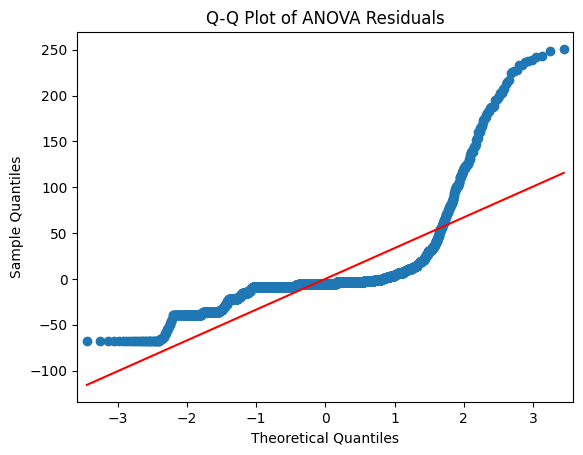

Levene’s Test for equal variances: statistic = 54.4091, p-value = 1.5480e-111
Variances are NOT equal.


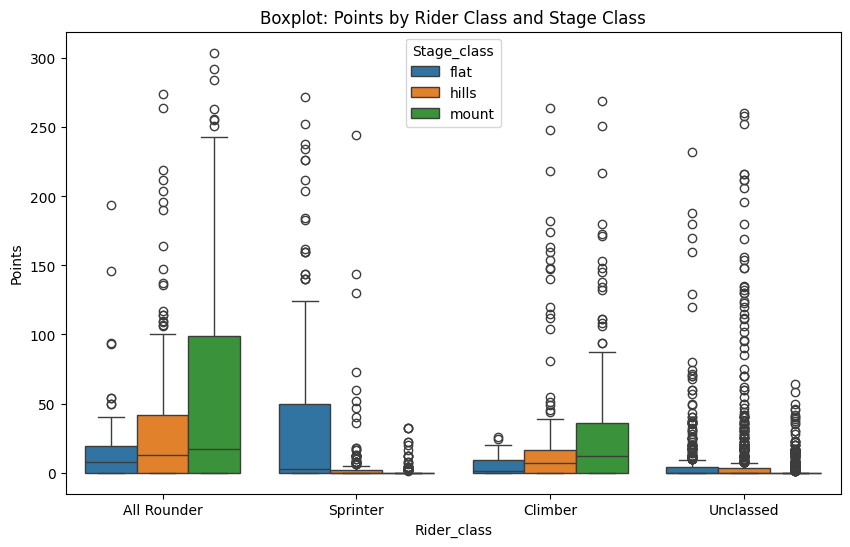

Look for large outliers in boxplot.
                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     53.18
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          4.50e-109
Time:                        12:46:30   Log-Likelihood:                -17244.
No. Observations:                3496   AIC:                         3.451e+04
Df Residuals:                    3484   BIC:                         3.459e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [ ]:
## Check all the asssumptions

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns


# Fit two-way ANOVA model
model = ols('Points ~ C(Rider_class) * C(Stage_class)', data=df).fit()

# 1. Independence (manual check, not code-based)
print("Is each measurement independent? (No repeated values for same rider & stage)")

# 2. Normality of Residuals
residuals = model.resid
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk Test for normality: statistic = {stat:.4f}, p-value = {p:.4e}')
if p < 0.05:
    print("Residuals are NOT normally distributed.")
else:
    print("Residuals look normally distributed.")
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ANOVA Residuals')
plt.show()

# 3. Homogeneity of variances (Levene’s test)
# Tests variance by the interaction groups of Rider and Stage class
groups = df.groupby(['Rider_class', 'Stage_class'])
group_values = [group['Points'].values for name, group in groups]

stat, p = levene(*group_values)
print(f"Levene’s Test for equal variances: statistic = {stat:.4f}, p-value = {p:.4e}")
if p < 0.05:
    print("Variances are NOT equal.")
else:
    print("Variances look equal across groups.")

# 4. Outliers
plt.figure(figsize=(10,6))
plt.title('Boxplot: Points by Rider Class and Stage Class')
plt.show()

print("Look for large outliers in boxplot.")

# Model summary (optional for further info)
print(model.summary())


# ART ANOVA

In [ ]:
#!pip install art_anova
import pandas as pd
from scipy.stats import rankdata, f_oneway

# Suppose df is your combined DataFrame with 'Points', 'Rider class', 'Stage Class'
df['Points_ranked'] = rankdata(df['Points'])
# Run two-way ANOVA on the ranked data (ignoring nonparametric limitations for full interaction)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Points_ranked ~ C(Rider_class) * C(Stage_class)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq      df           F        PR(>F)
C(Rider_class)                 2.568430e+08     3.0  125.145315  5.544170e-77
C(Stage_class)                 7.401342e+06     2.0    5.409394  4.512011e-03
C(Rider_class):C(Stage_class)  7.083152e+07     6.0   17.256132  9.205357e-20
Residual                       2.383472e+09  3484.0         NaN           NaN
